## EX01

##### Make a Heatmap to see the Correlation Coefficient between the data

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import polars as pl

In [5]:
df_test = pl.read_csv("../Test_knight.csv")
df_train = pl.read_csv("../Train_knight.csv")

In [3]:
df_test.head()

Sensitivity,Hability,Strength,Power,Agility,Dexterity,Awareness,Prescience,Reactivity,Midi-chlorien,Slash,Push,Pull,Lightsaber,Survival,Repulse,Friendship,Blocking,Deflection,Mass,Recovery,Evade,Stims,Sprint,Combo,Delay,Attunement,Empowered,Burst,Grasping
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
11.42,20.38,77.58,386.1,0.1425,0.2839,0.2414,0.1052,0.2597,0.09744,0.4956,1.156,3.445,27.23,0.00911,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.5,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.173
18.25,19.98,119.6,1040.0,0.09463,0.109,0.1127,0.074,0.1794,0.05742,0.4467,0.7732,3.18,53.91,0.004314,0.01382,0.02254,0.01039,0.01369,0.002179,22.88,27.66,153.2,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
14.68,20.13,94.74,684.5,0.09867,0.072,0.07395,0.05259,0.1586,0.05922,0.4727,1.24,3.195,45.4,0.005718,0.01162,0.01998,0.01109,0.0141,0.002085,19.07,30.88,123.4,1138.0,0.1464,0.1871,0.2914,0.1609,0.3029,0.08216
13.54,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.04781,0.1885,0.05766,0.2699,0.7886,2.058,23.56,0.008462,0.0146,0.02387,0.01315,0.0198,0.0023,15.11,19.26,99.7,711.2,0.144,0.1773,0.239,0.1288,0.2977,0.07259
15.34,14.26,102.5,704.4,0.1073,0.2135,0.2077,0.09756,0.2521,0.07032,0.4388,0.7096,3.384,44.91,0.006789,0.05328,0.06446,0.02252,0.03672,0.004394,18.07,19.08,125.1,980.9,0.139,0.5954,0.6305,0.2393,0.4667,0.09946


In [8]:
%pip install pyarrow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


knight_encoded    1.000000
Survival          0.043099
Deflection        0.026489
Push              0.019446
Midi-chlorien    -0.008132
Mass             -0.113185
Friendship       -0.236633
Repulse          -0.324399
Grasping         -0.350105
Reactivity       -0.375103
Agility          -0.397458
Blocking         -0.421950
Combo            -0.445223
Burst            -0.445847
Hability         -0.446632
Evade            -0.465605
Lightsaber       -0.515340
Pull             -0.537800
Slash            -0.550663
Delay            -0.598072
Dexterity        -0.631987
Attunement       -0.648893
Awareness        -0.699662
Power            -0.700709
Sensitivity      -0.721566
Strength         -0.737403
Sprint           -0.739672
Recovery         -0.777633
Stims            -0.786797
Prescience       -0.790066
Empowered        -0.793652
Name: knight_encoded, dtype: float64


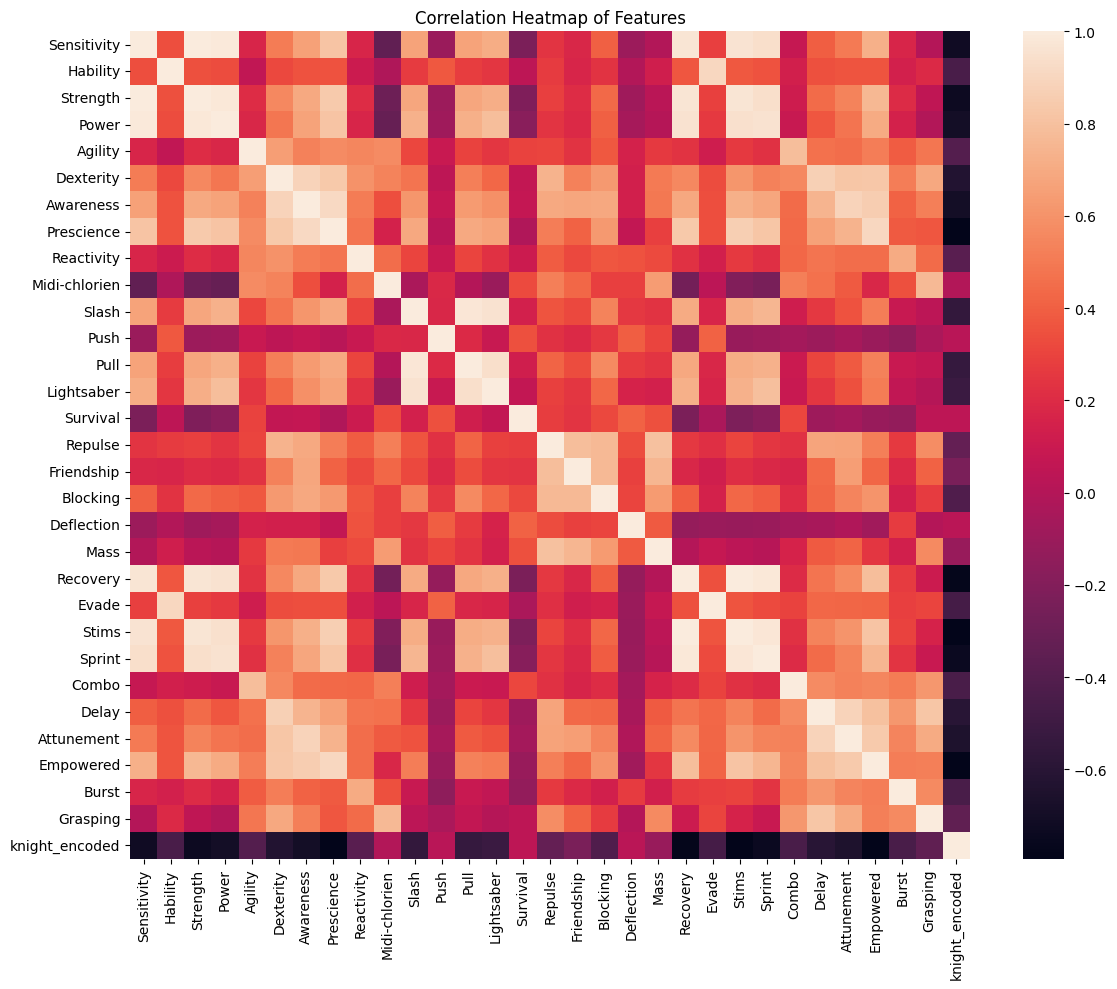

In [19]:
# Convert Polars DataFrame to pandas DataFrame
df_train_pd = df_train.to_pandas()

# Encode the 'knight' column (Jedi=1, Sith=0)
df_train_pd['knight_encoded'] = (df_train_pd['knight'] == 'Sith').astype(int)

# Calculate correlation matrix excluding the original 'knight' column
correlation_matrix = df_train_pd.drop('knight', axis=1).corr()

# Get correlations with knight_encoded and sort them
correlation_with_knight = correlation_matrix['knight_encoded'].sort_values(ascending=False)
print(correlation_with_knight)

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix)
sns.color_palette("flare", as_cmap=True)
plt.title('Correlation Heatmap of Features')
plt.tight_layout()
plt.show()
